<a href="https://colab.research.google.com/github/farshid101/Deep-learning-Practice-/blob/main/DP_practices_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import tensorflow

In [1]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [2]:
import datetime

print(datetime.datetime.now())

2023-06-21 14:01:16.427481


# import Datasets

In [4]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")


11490434/11490434 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(x_train , y_train ) ,( x_test , y_test ) = tf.keras.datasets.mnist.load_data()

In [7]:
x_train[0] , y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

In [17]:
x_train.shape , x_train.ndim , y_train.shape , y_train.ndim

((60000, 28, 28), 3, (60000,), 1)

# Finding label values


In [20]:
import numpy as np


label_values = np.unique(y_train)

label_values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Draw the datasets

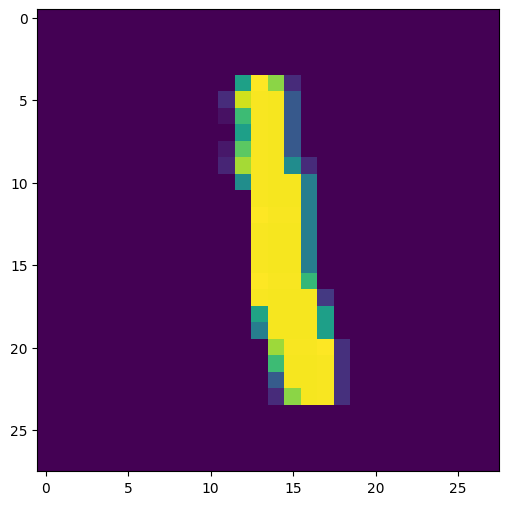

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(x_train[6])
plt.show()

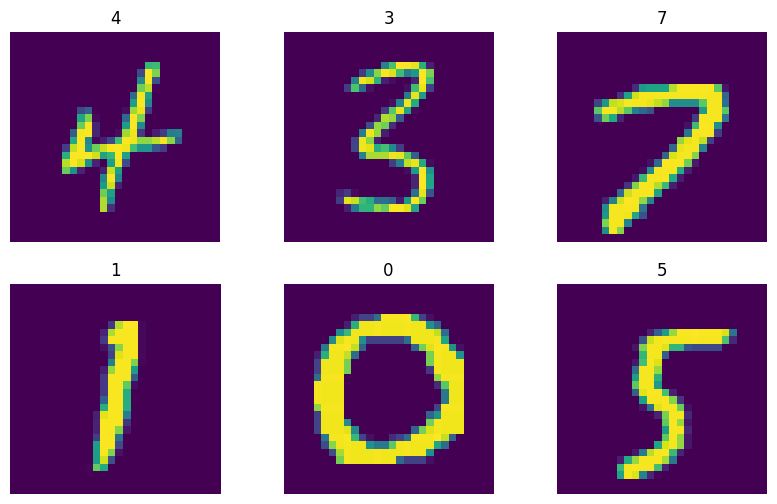

In [31]:
import random

plt.figure(figsize=(10,6))
for i in range(6):
  ax=plt.subplot(2 ,3 ,i+1 )
  n =random.choice(range(len(x_train)))
  plt.imshow(x_train[n])
  plt.title( y_train[n])
  plt.axis(False)

# Creating Model

###This is a Multiclass Classification Problem
### Because The label has multiple value



In [35]:
len(label_values)

10

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
#input shape
28*28

784

# The Model

In [52]:
tf.random.set_seed(42)


#Create model

model_1 =tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=( 28,28 ) ),
    tf.keras.layers.Dense(10 , activation="relu")  ,
    tf.keras.layers.Dense(10 , activation="relu") ,

    tf.keras.layers.Dense(10 ,activation="softmax")


])

#Create Compiler

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam() ,
    metrics="accuracy"

)

history_1 =model_1.fit(x_train , y_train , epochs=15 , validation_data=(x_test , y_test) )



Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0788 - accuracy: 0.2738 - val_loss: 1.5297 - val_accuracy: 0.4033
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3001 - accuracy: 0.4634 - val_loss: 1.1610 - val_accuracy: 0.5006
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0536 - accuracy: 0.5767 - val_loss: 0.9317 - val_accuracy: 0.6345
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9026 - accuracy: 0.6487 - val_loss: 0.8529 - val_accuracy: 0.6585
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8290 - accuracy: 0.6828 - val_loss: 0.8313 - val_accuracy: 0.6884
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7885 - accuracy: 0.7048 - val_loss: 0.7539 - val_accuracy: 0.7113
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7469 - accuracy: 0.7206 - val_loss: 0.8012 - val_accuracy:

In [54]:
model_1.evaluate(x_train , y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3840 - accuracy: 0.8895


[0.3839823007583618, 0.8895000219345093]

In [56]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [64]:
import matplotlib.pyplot as plt
def view(x,y,i):
  plt.figure(figsize=(10,6))
  plt.imshow(x[i])
  plt.title(f"Image = {y[i]} ")
  plt.show()

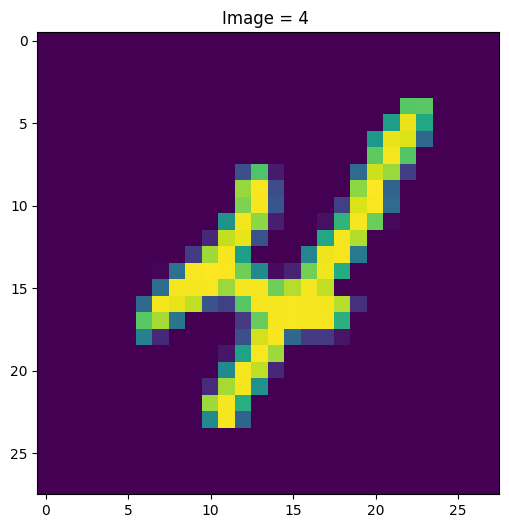

In [65]:
view(x_train,y_train ,9)

In [188]:
def pre(model, x , y ,i ):
  y_pred = model.predict(x[i].reshape(1,28,28))

  #y_pred = model_1.predict(x_test[9].reshape(1, 28,28))
  #y_pred.max()
  #y_pred.argmax()

  print(
     f" Y predict value is = { y_pred.argmax()  }  \n Y Ture value is { y[i] } "
  )
  if(y_pred.argmax()==y[i]):
    print("\n Success Prediction  , Yessss")
  else:
    print("\n Failed  Prediction , Noooo")





In [91]:
len(x_test)

10000

In [189]:
pre(model_1 ,x_test ,y_test ,1842 )

1/1 [==============================] - 0s 20ms/step
 Y predict value is = 2  
 Y Ture value is 2 

 Success Prediction  , Yessss


# Improving Model

In [104]:
tf.random.set_seed(42)



model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,

    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(80 ,activation="tanh") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu" ),

    tf.keras.layers.Dense(10 ,activation="softmax")

])


model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics="accuracy"
)


history_2=model_2.fit(x_train ,y_train , epochs=40 , validation_data=(x_test , y_test ))

Epoch 1/40
1875/1875 [==============================] - 10s 4ms/step - loss: 0.9568 - accuracy: 0.6725 - val_loss: 0.8131 - val_accuracy: 0.7140
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7210 - accuracy: 0.7584 - val_loss: 0.6207 - val_accuracy: 0.7910
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5995 - accuracy: 0.8051 - val_loss: 0.5851 - val_accuracy: 0.8209
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5426 - accuracy: 0.8244 - val_loss: 0.4844 - val_accuracy: 0.8432
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5072 - accuracy: 0.8348 - val_loss: 0.4486 - val_accuracy: 0.8565
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4576 - accuracy: 0.8550 - val_loss: 0.4402 - val_accuracy: 0.8623
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4250 - accuracy: 0.8645 - val_loss: 0.3939 - val_accuracy

# Comparing model one and model two

<Figure size 500x500 with 0 Axes>

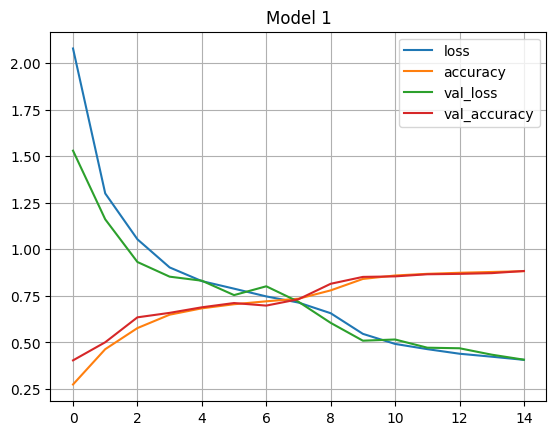

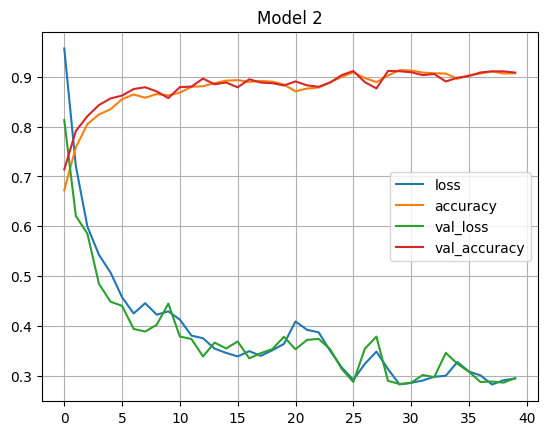

In [110]:

import pandas as pd

plt.figure(figsize=(5,5))

pd.DataFrame(history_1.history).plot(title="Model 1").grid()

pd.DataFrame(history_2.history).plot(title="Model 2").grid();

# Imporving Model more

In [111]:
tf.random.set_seed(42)



model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,

    tf.keras.layers.Dense(100 , activation="tanh"),
    tf.keras.layers.Dense(90 ,activation="relu") ,
    tf.keras.layers.Dense(80 ,activation="relu") ,
    tf.keras.layers.Dense(70 ,activation="relu") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(30 ,activation="relu") ,
    tf.keras.layers.Dense(25 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu" ),
    tf.keras.layers.Dense(15 ,activation="relu" ),

    tf.keras.layers.Dense(10 ,activation="softmax")

])


model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics="accuracy"
)


history_3=model_3.fit(x_train ,y_train , epochs=40 , validation_data=(x_test , y_test ))

Epoch 1/40
1875/1875 [==============================] - 13s 6ms/step - loss: 0.8400 - accuracy: 0.7176 - val_loss: 0.5646 - val_accuracy: 0.8153
Epoch 2/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5065 - accuracy: 0.8377 - val_loss: 0.4604 - val_accuracy: 0.8569
Epoch 3/40
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4334 - accuracy: 0.8616 - val_loss: 0.4066 - val_accuracy: 0.8689
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3804 - accuracy: 0.8799 - val_loss: 0.3419 - val_accuracy: 0.8930
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3781 - accuracy: 0.8783 - val_loss: 0.3543 - val_accuracy: 0.8908
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3679 - accuracy: 0.8843 - val_loss: 0.3388 - val_accuracy: 0.8952
Epoch 7/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3337 - accuracy: 0.8971 - val_loss: 0.3164 - val_accur

# With same epochs But different layers Comparing

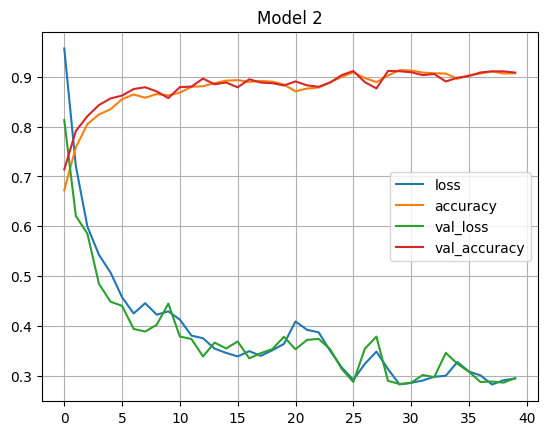

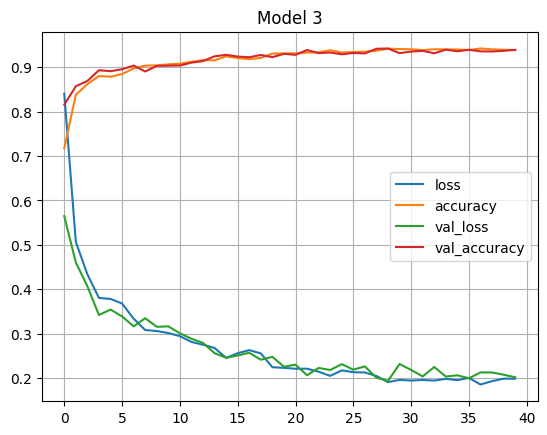

In [113]:

import pandas as pd



pd.DataFrame(history_2.history).plot(title="Model 2").grid()

pd.DataFrame(history_3.history).plot(title="Model 3").grid();

In [115]:
tf.random.set_seed(42)



model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,

    tf.keras.layers.Dense(400 , activation="relu"),
    tf.keras.layers.Dense(300 , activation="relu"),
    tf.keras.layers.Dense(200 , activation="relu"),
    tf.keras.layers.Dense(100 , activation="relu"),
    tf.keras.layers.Dense(90 ,activation="relu") ,
    tf.keras.layers.Dense(85 ,activation="relu") ,
    tf.keras.layers.Dense(80 ,activation="relu") ,
    tf.keras.layers.Dense(70 ,activation="relu") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(30 ,activation="relu") ,
    tf.keras.layers.Dense(25 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu" ),
    tf.keras.layers.Dense(15 ,activation="relu" ),

    tf.keras.layers.Dense(10 ,activation="softmax")

])


model_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(lr=0.002),
    metrics="accuracy"
)


history_4=model_4.fit(x_train ,y_train , epochs=40 , validation_data=(x_test , y_test ))

Epoch 1/40
1875/1875 [==============================] - 26s 13ms/step - loss: 0.3673 - accuracy: 0.8996 - val_loss: 0.1700 - val_accuracy: 0.9571
Epoch 2/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1769 - accuracy: 0.9565 - val_loss: 0.1733 - val_accuracy: 0.9535
Epoch 3/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1403 - accuracy: 0.9658 - val_loss: 0.1219 - val_accuracy: 0.9722
Epoch 4/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1179 - accuracy: 0.9727 - val_loss: 0.1270 - val_accuracy: 0.9686
Epoch 5/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1003 - accuracy: 0.9765 - val_loss: 0.1237 - val_accuracy: 0.9733
Epoch 6/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0954 - accuracy: 0.9780 - val_loss: 0.1413 - val_accuracy: 0.9644
Epoch 7/40
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0870 - accuracy: 0.9799 - val_loss: 0.1227 -

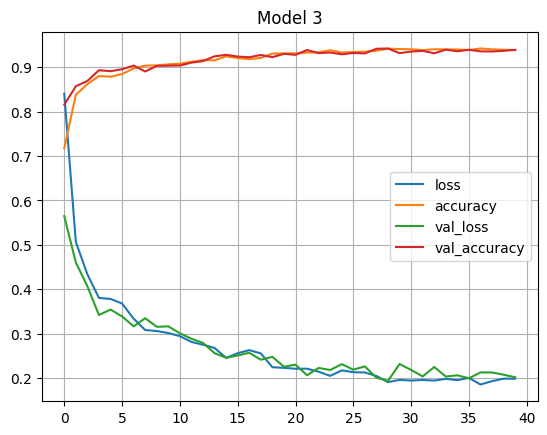

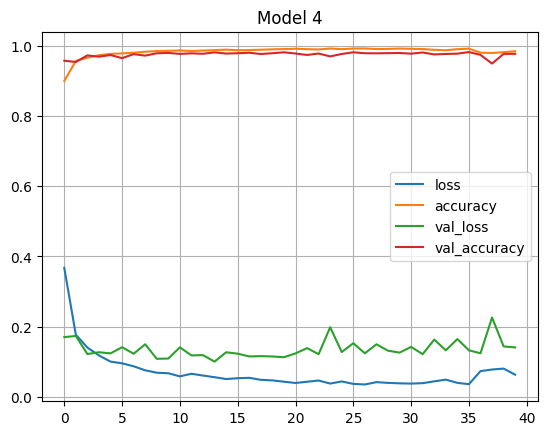

In [117]:
import pandas as pd



pd.DataFrame(history_3.history).plot(title="Model 3").grid()

pd.DataFrame(history_4.history).plot(title="Model 4").grid();

In [124]:
pre(model_4 ,x_test ,y_test ,5457
)

1/1 [==============================] - 0s 33ms/step
 Y predict value is = 8  
 Y Ture value is 1


In [125]:
pre(model_3 ,x_test ,y_test ,5457)

1/1 [==============================] - 0s 136ms/step
 Y predict value is = 8  
 Y Ture value is 1


### This image has noise

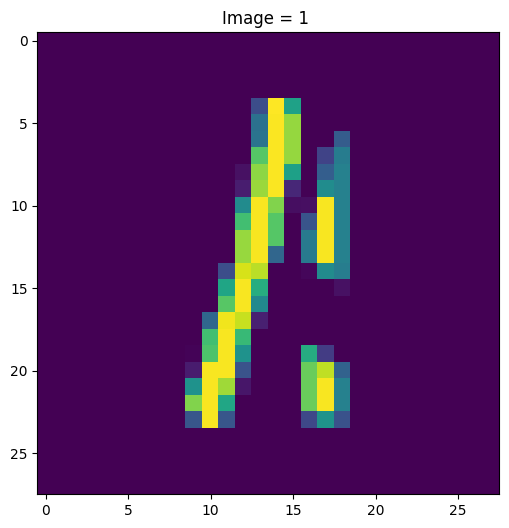

In [127]:
view(x_test,y_test ,5457)

# Checking the model

1/1 [==============================] - 0s 28ms/step
 Y predict value is = 7  
 Y Ture value is 7 

 Success Prediction  , Yessss
None
index is 6855


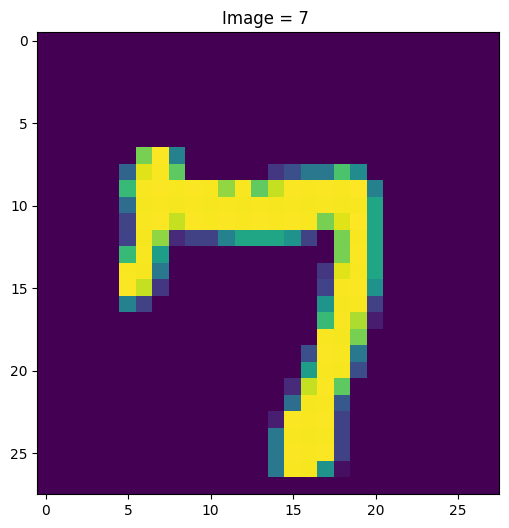

In [197]:
n =random.choice(range(len(x_test)))
print(pre(model_4 ,x_test ,y_test ,n) )
print(f"index is {n}")
view(x_test,y_test ,n)